<a href="https://colab.research.google.com/github/uruba24/ObesityData_NN_Training/blob/main/Obesity_Data_NN_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

## **Step 1: Check the Structure of the Dataset**

In [3]:
data = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic (1).csv')

In [4]:
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,14.0,Male,1.71,72.0,no,yes,3.0,3.0,no,no,3.0,yes,2.0,1.0,Sometimes,Walking,Normal_Weight
1,15.0,Female,1.65,86.0,no,yes,3.0,3.0,no,no,1.0,yes,3.0,2.0,Sometimes,Walking,Obesity_Type_I
2,16.0,Male,1.67,50.0,no,yes,2.0,1.0,no,no,3.0,yes,1.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
3,16.0,Male,1.82,71.0,Sometimes,yes,2.0,3.0,no,no,2.0,yes,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
4,16.0,Female,1.66,58.0,no,no,2.0,1.0,no,no,1.0,no,0.0,1.0,Sometimes,Walking,Normal_Weight


In [5]:
#check dataset shape
data.shape

(2111, 17)

In [6]:
#column names and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [7]:
#check missing values
missing_values = data.isnull().sum()
print(missing_values)

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [8]:
#statustical summary
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## **Step 2: Additional Exploratory Data Analysis (EDA)**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sns.set_theme(style='whitegrid')

<ipython-input-11-65bb6227f6a6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='NObeyesdad', order=data['NObeyesdad'].value_counts().index, palette='viridis')


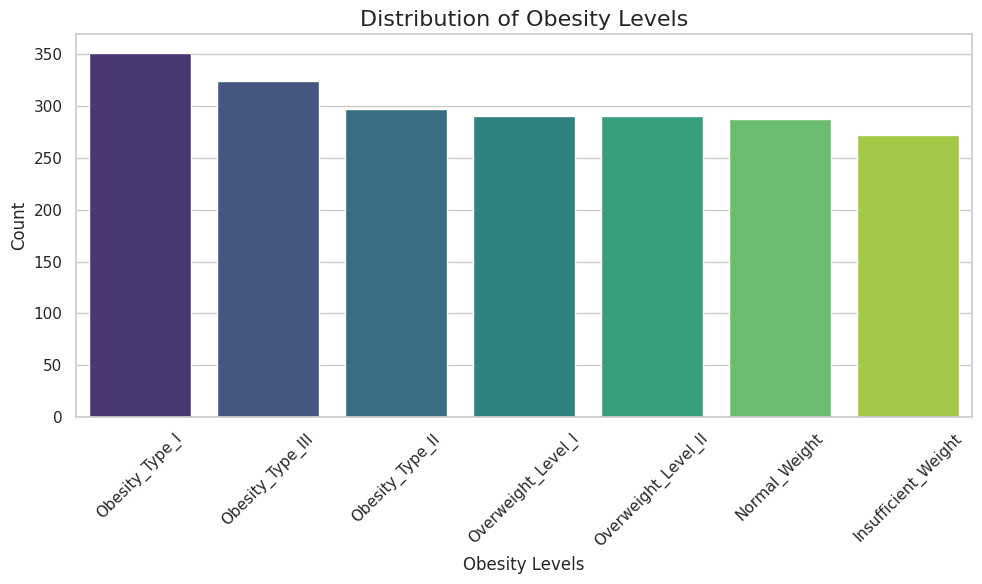

In [11]:
# Distribution of Obesity Levels
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='NObeyesdad', order=data['NObeyesdad'].value_counts().index, palette='viridis')
plt.title('Distribution of Obesity Levels', fontsize=16)
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-12-9f1560d64687>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='NObeyesdad', y='Age', order=data['NObeyesdad'].value_counts().index, palette='muted')


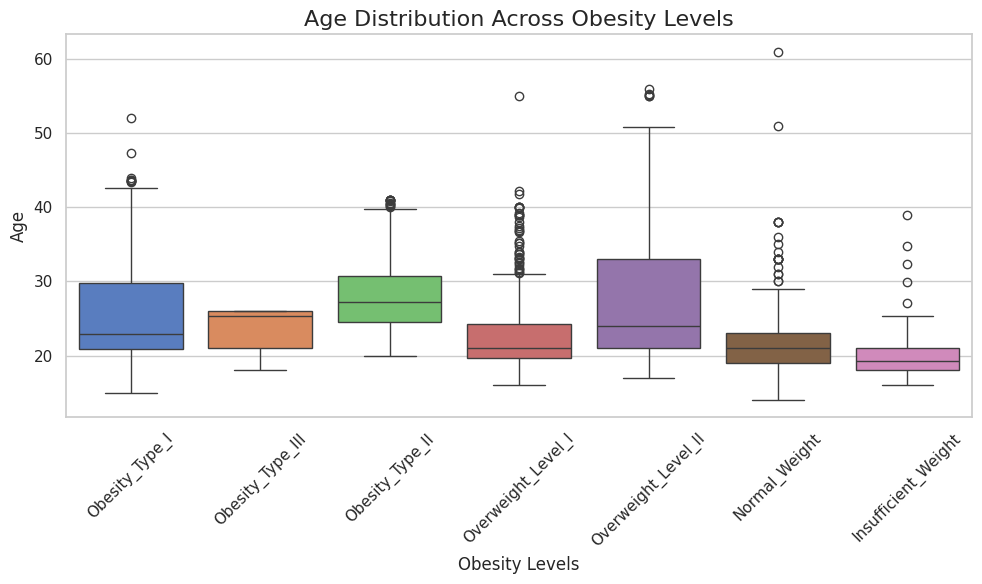

In [12]:
#Age vs. Obesity Levels
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='NObeyesdad', y='Age', order=data['NObeyesdad'].value_counts().index, palette='muted')
plt.title('Age Distribution Across Obesity Levels', fontsize=16)
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-13-336b358362e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='NObeyesdad', y='FAF', order=data['NObeyesdad'].value_counts().index, palette='pastel')


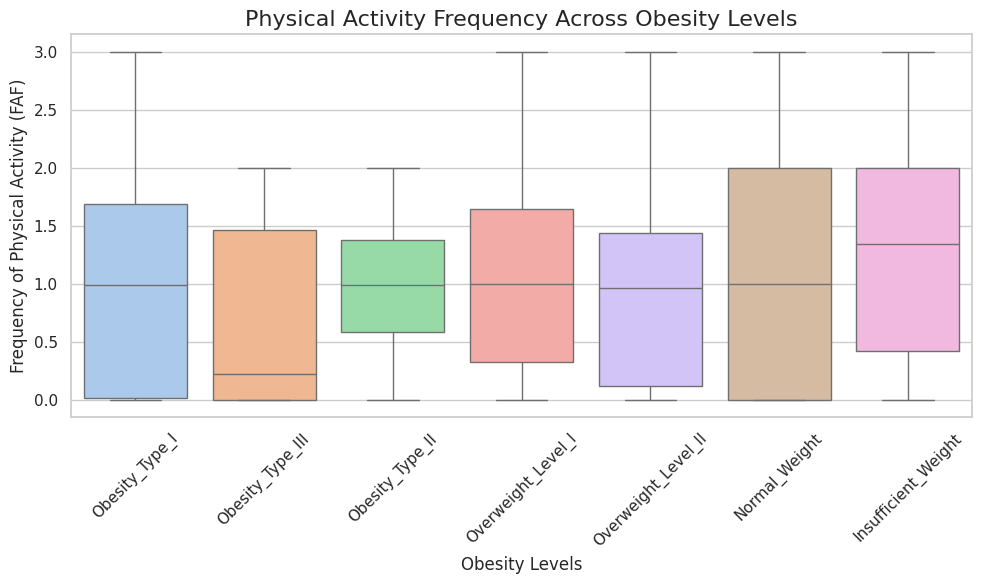

In [13]:
#Physical Activity Frequency vs. Obesity Levels
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='NObeyesdad', y='FAF', order=data['NObeyesdad'].value_counts().index, palette='pastel')
plt.title('Physical Activity Frequency Across Obesity Levels', fontsize=16)
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Frequency of Physical Activity (FAF)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Step 3: Prepare Data for Training**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
import numpy as np

In [15]:
# Split dataset into features (X) and target (y)
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

In [16]:
# One-hot encode categorical features
categorical_cols = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
                    'family_history_with_overweight', 'CAEC', 'MTRANS']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]),
                         columns=encoder.get_feature_names_out(categorical_cols))

In [17]:
# Drop original categorical columns and add encoded columns
X = X.drop(columns=categorical_cols)
X = pd.concat([X, X_encoded], axis=1)

In [18]:
#Normalize numerical features
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [19]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [20]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your target variable and transform it
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [21]:
# Check the processed data
{
    "X_train_shape": X_train.shape,
    "X_test_shape": X_test.shape,
    "y_train_distribution": pd.Series(y_train).value_counts(normalize=True).to_dict(),
    "y_test_distribution": pd.Series(y_test).value_counts(normalize=True).to_dict()
}

{'X_train_shape': (1688, 31),
 'X_test_shape': (423, 31),
 'y_train_distribution': {2: 0.16646919431279622,
  4: 0.15343601895734596,
  3: 0.14040284360189573,
  5: 0.13744075829383887,
  6: 0.13744075829383887,
  1: 0.13566350710900474,
  0: 0.12914691943127962},
 'y_test_distribution': {2: 0.16548463356973994,
  4: 0.1536643026004728,
  3: 0.14184397163120568,
  1: 0.13711583924349882,
  6: 0.13711583924349882,
  5: 0.13711583924349882,
  0: 0.1276595744680851}}

## **Step 4: Build the Neural Network Model**

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [23]:
num_classes = len(np.unique(y_train))

In [24]:
# Build the model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,663 (57.28 KB)

 Trainable params: 14,663 (57.28 KB)

 Non-trainable params: 0 (0.00 B)

## **Step 5: Train the Neural Network**

In [27]:
# Train the model
X_train = X_train.astype(float)
y_train = y_train.astype(float)
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2590 - loss: 1.8814 - val_accuracy: 0.4911 - val_loss: 1.6156
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5206 - loss: 1.5000 - val_accuracy: 0.5237 - val_loss: 1.2609
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5845 - loss: 1.1564 - val_accuracy: 0.5858 - val_loss: 1.0684
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6780 - loss: 0.9456 - val_accuracy: 0.6331 - val_loss: 0.9763
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7101 - loss: 0.8152 - val_accuracy: 0.6775 - val_loss: 0.8780
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7326 - loss: 0.7326 - val_accuracy: 0.6775 - val_loss: 0.8141
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7673 - loss: 0.6665 - val_accuracy: 0.7012 - val_loss: 0.7689
Epoch 8/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8082 - loss: 0.5721 - val_accuracy: 0.7308 - val_loss:

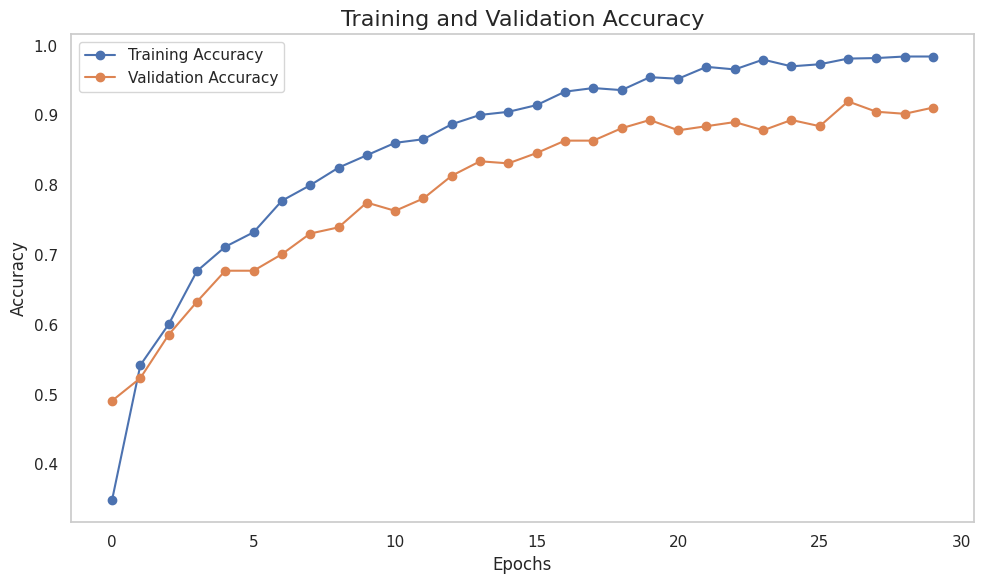

In [28]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

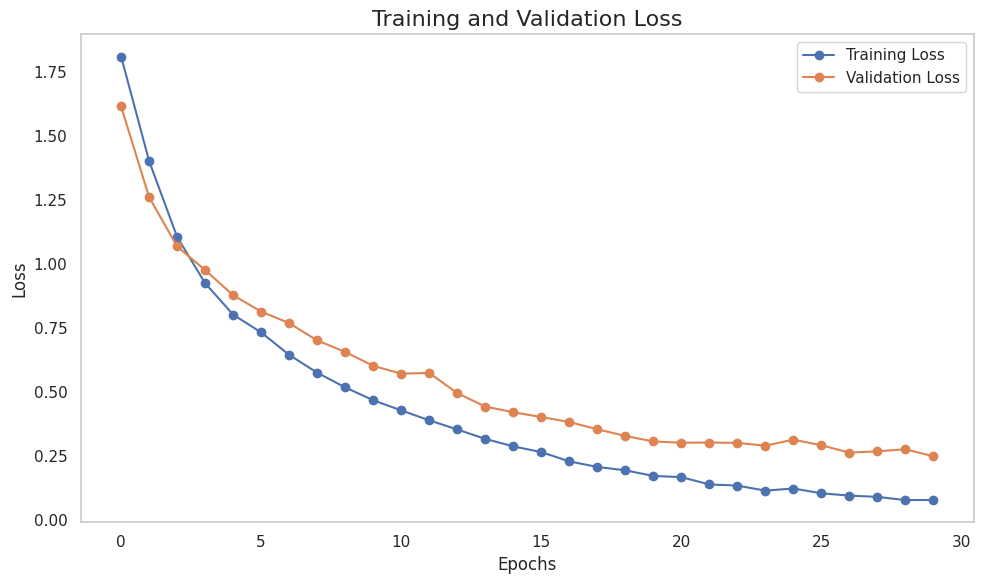

In [29]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## **Step 6: Evaluate the Model**

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9250 - loss: 0.2748  


In [31]:
# Print test results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.9314
Test Loss: 0.2523


In [33]:
# Predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


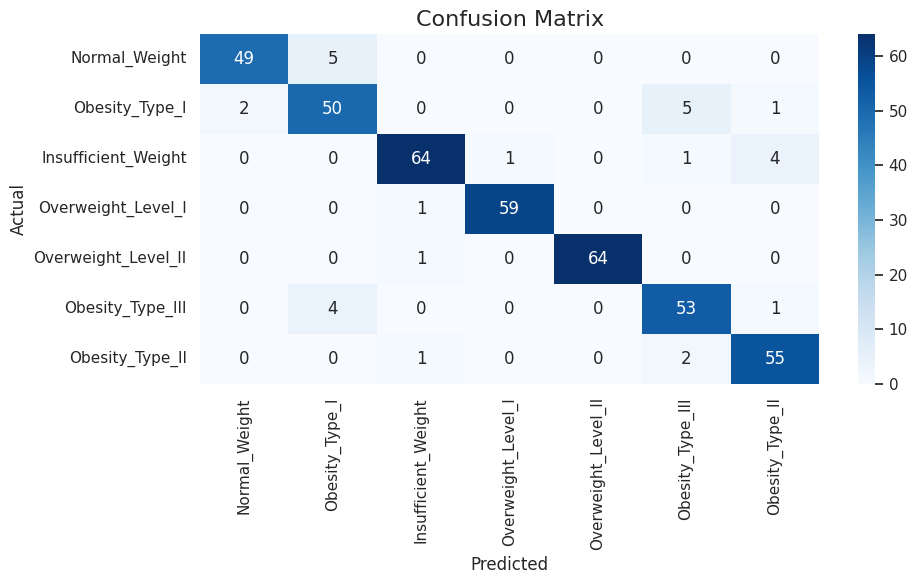

In [35]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.tight_layout()
plt.show()

In [36]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=y.unique()))

Classification Report:
                     precision    recall  f1-score   support

      Normal_Weight       0.96      0.91      0.93        54
     Obesity_Type_I       0.85      0.86      0.85        58
Insufficient_Weight       0.96      0.91      0.93        70
 Overweight_Level_I       0.98      0.98      0.98        60
Overweight_Level_II       1.00      0.98      0.99        65
   Obesity_Type_III       0.87      0.91      0.89        58
    Obesity_Type_II       0.90      0.95      0.92        58

           accuracy                           0.93       423
          macro avg       0.93      0.93      0.93       423
       weighted avg       0.93      0.93      0.93       423



## **Step 7: Class Discussion**

### **Key Discussion Points:**

**Model Performance:**

* How accurate was the model on the test data?

* Were there any issues such as overfitting (training accuracy much higher than validation/test accuracy)?


**Confusion Matrix:**

* Which classes were most often misclassified?

* Is there any imbalance in predictions that could affect the model's utility?

**Feature Importance:**

* Did certain features (e.g., age, physical activity, or food consumption) have a significant impact on predictions?

**Areas for Improvement:**

* Adjust the model architecture (e.g., increase/
decrease layers or neurons).

* Tune hyperparameters (e.g., learning rate, batch size, epochs).

* Experiment with different preprocessing techniques (e.g., balancing classes, feature selection).

* Use advanced techniques like dropout layers or batch normalization to address overfitting.


### **Suggestions for Improvement**

Here’s how you can improve your model further:

**Hyperparameter Tuning:**

* Use techniques like Grid Search or Random Search to optimize hyperparameters.

**Feature Engineering:**

* Analyze feature importance and drop unimportant features.
* Create new meaningful features if possible.

**Data Augmentation:**

* Balance the dataset by oversampling underrepresented classes using techniques like SMOTE (Synthetic Minority Oversampling Technique).

**Cross-Validation:**

* Implement k-fold cross-validation to ensure the model's performance is robust and not dependent on a single split.
